In [1]:
import pandas as pd
import numpy as np
import pyarrow
import seaborn as sns

In [2]:
# get electric vehicle data
ev_df = pd.read_parquet('data/Cleaned data/all_vehicles_electric__df.parquet', engine='pyarrow')

In [3]:
correlation_ev = ev_df.corr()
correlation_ev

,Year,gdhi,age,population,Average variable unit price (£/kWh),ULSP: Pump price (p/litre),ULSD: Pump price (p/litre),Number of vehicles,Sum of Chargepoints,NQF level 4 or above,NQF level 3 or above,NQF level 2 or above
Year,1.000000e+00,3.051957e-01,-2.126585e-15,0.082171,8.885710e-01,-4.174282e-01,-3.477211e-01,9.822258e-02,1.495904e-01,7.186287e-01,5.644159e-01,5.392786e-01
gdhi,3.051957e-01,1.000000e+00,2.828604e-15,0.109105,2.375095e-01,-1.348159e-01,-1.135328e-01,6.238438e-02,1.440638e-01,2.874157e-01,2.587601e-01,3.019255e-01
age,-2.126585e-15,2.828604e-15,1.000000e+00,-0.266608,-3.998308e-15,-1.589794e-16,-1.455574e-15,-4.843932e-15,-5.297887e-16,-2.624885e-15,-1.063292e-15,-9.338049e-16
population,8.217078e-02,1.091047e-01,-2.666080e-01,1.000000,6.295396e-03,-4.116986e-02,-3.564488e-02,6.717059e-02,8.895760e-02,8.953533e-02,9.577402e-02,2.081073e-01
Average variable unit price (£/kWh),8.885710e-01,2.375095e-01,-3.998308e-15,0.006295,1.000000e+00,-2.079814e-01,-1.252611e-01,8.950227e-02,1.489210e-01,5.414879e-01,3.463481e-01,3.178734e-01
ULSP: Pump price (p/litre),-4.174282e-01,-1.348159e-01,-1.589794e-16,-0.041170,-2.079814e-01,1.000000e+00,9.935959e-01,-3.745843e-02,-7.266613e-02,-3.617661e-01,-3.294274e-01,-1.828211e-01
ULSD: Pump price (p/litre),-3.477211e-01,-1.135328e-01,-1.455574e-15,-0.035645,-1.252611e-01,9.935959e-01,1.000000e+00,-2.937226e-02,-5.758654e-02,-3.079162e-01,-2.941571e-01,-1.395008e-01
Number of vehicles,9.822258e-02,6.238438e-02,-4.843932e-15,0.067171,8.950227e-02,-3.745843e-02,-2.937226e-02,1.000000e+00,2.395193e-02,7.611935e-02,5.402713e-02,7.090962e-02
Sum of Chargepoints,1.495904e-01,1.440638e-01,-5.297887e-16,0.088958,1.489210e-01,-7.266613e-02,-5.758654e-02,2.395193e-02,1.000000e+00,1.259376e-01,9.078958e-02,9.007769e-02
NQF level 4 or above,7.186287e-01,2.874157e-01,-2.624885e-15,0.089535,5.414879e-01,-3.617661e-01,-3.079162e-01,7.611935e-02,1.259376e-01,1.000000e+00,9.480024e-01,7.656440e-01


<AxesSubplot: >

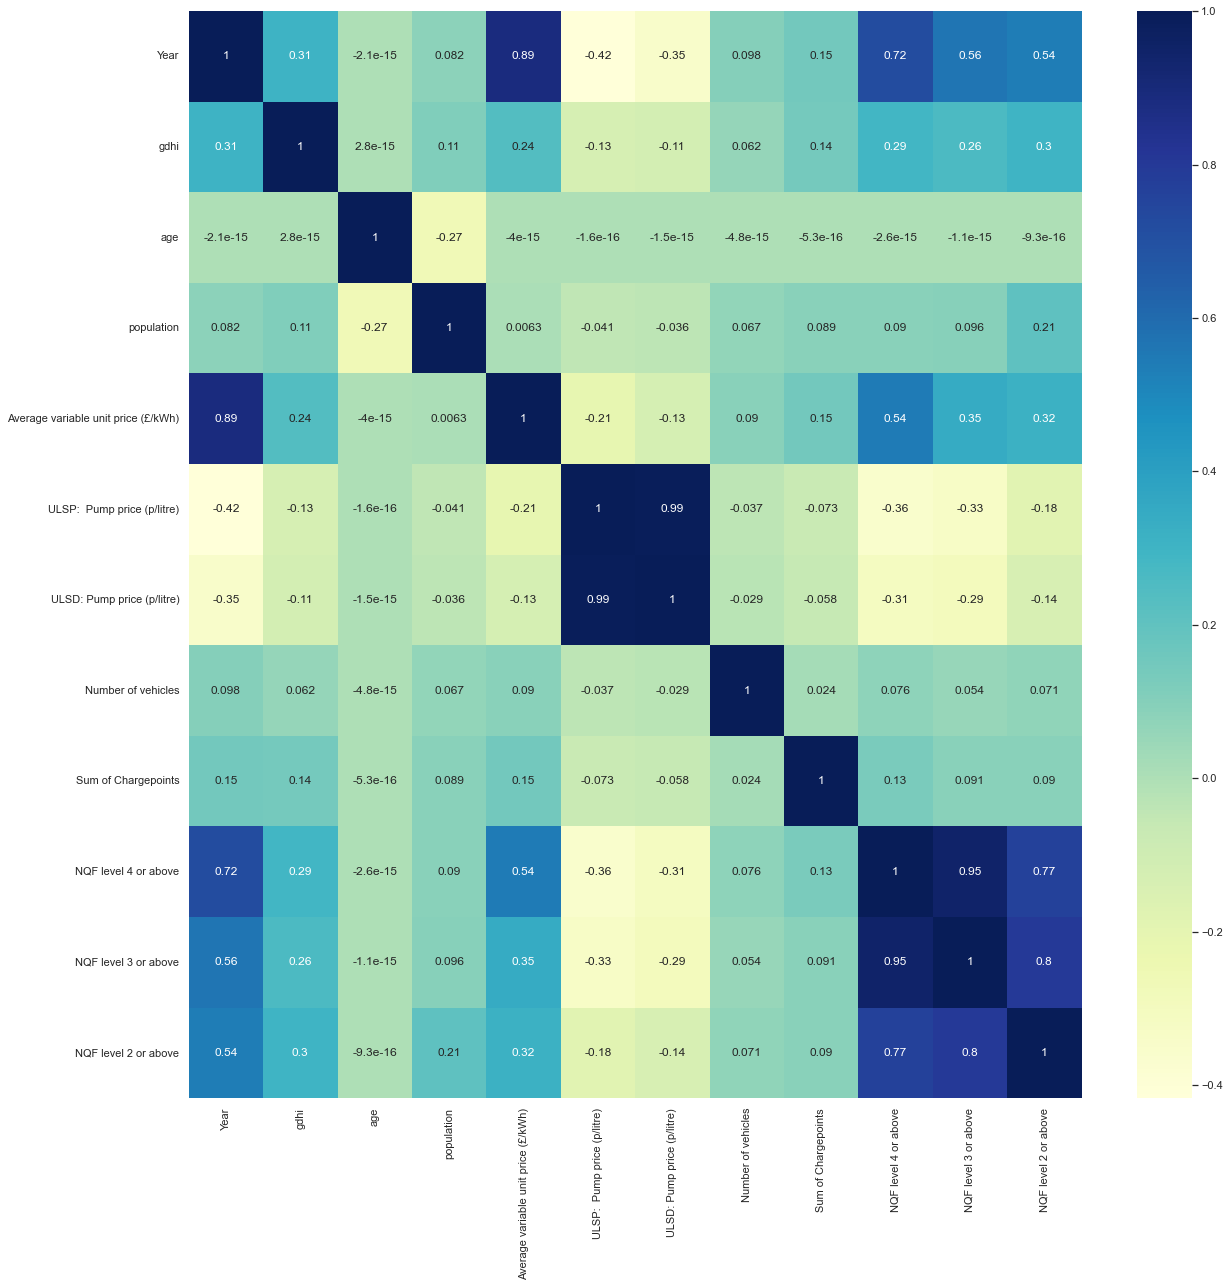

In [4]:
# make it bigger
sns.set(rc={'figure.figsize':(20,20)})
# make a heatmap and make it pretty
sns.heatmap(correlation_ev, cmap="YlGnBu", annot=True)


In [8]:
ev_df.columns

Index(['ITL level 3', 'Year', 'gdhi', 'sex', 'age', 'population',
       'ITL level 1', 'ITL level 2', 'Average variable unit price (£/kWh)',
       ' ULSP:  Pump price (p/litre)', 'ULSD: Pump price (p/litre)',
       'BodyType', 'Fuel', 'Keepership', 'Number of vehicles',
       'Sum of Chargepoints', 'NQF level 4 or above', 'NQF level 3 or above',
       'NQF level 2 or above'],
      dtype='object')

In [14]:
# use ev_df to make a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# split the data into training and testing sets - Year	gdhi	age	population	Average variable unit price (£/kWh)	ULSP: Pump price (p/litre)	ULSD: Pump price (p/litre)	Number of vehicles	Sum of Chargepoints	NQF level 4 or above	NQF level 3 or above	NQF level 2 or above
X_train, X_test, y_train, y_test = train_test_split(ev_df[['Year', 'gdhi', 'age', 'population', 'Average variable unit price (£/kWh)', ' ULSP:  Pump price (p/litre)', 'ULSD: Pump price (p/litre)', 'Sum of Chargepoints', 'NQF level 4 or above', 'NQF level 3 or above', 'NQF level 2 or above']], ev_df['Number of vehicles'], test_size=0.2, random_state=42)

# create a linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test data
predictions = model.predict(X_test)

# get the r^2 score
model.score(X_test, y_test)

0.01581014244589518

In [13]:
# predict the number of electric vehicles in 2022 by using the model and only the year
model.predict([[2022]])

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 12 features as input.